在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [1]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## 从 daily_engagement.csv 和 project_submissions.csv 载入数据并存
## 储至下面的变量中，然后检查每张表的第1行。
def csvReader(filename):
    with open(filename,"rb") as f:
        reader = unicodecsv.DictReader(f)
        result = list(reader)
    return result

daily_engagement = csvReader("daily-engagement.csv")
project_submissions = csvReader("project-submissions.csv")

## 修正数据类型

In [3]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [4]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    #because the value type is str containing float, which can't change the str to the int diectly.So we need change to float firstly
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [6]:
#####################################
#                 2                 #
#####################################

## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量
def calValue(data, index=None):
    totalValue = 0
    uniqueId = set()
    if index:
        for i in data:
            totalValue += 1
            uniqueId.add(i[index])
#         result = (totalValue, uniqueId)
    else:
        print("You need enter index")
        return
    return (totalValue, uniqueId)

enrollmentCount, enrollmentID = calValue(enrollments, "account_key")
engagementCount, engagementID = calValue(daily_engagement, "acct")
submissionCount, submissionID = calValue(project_submissions, "account_key")

enrollmentUniqueCount = len(enrollmentID)
engagementUniqueCount = len(engagementID)
submissionUniqueCount = len(submissionID)

## 数据中的问题

In [7]:
#####################################
#                 3                 #
#####################################

## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"
def renameKey(data, oldIndex=None, newIndex=None):
#     from copy import deepcopy
    newData = data.copy()
    for i in newData:
        i[newIndex]  = i[oldIndex]
        del(i[oldIndex])
    return newData

test = renameKey(daily_engagement, "acct", "account_key")
test[0]["account_key"]

'0'

## 缺失的互动（Engagement）记录

In [8]:
#####################################
#                 4                 #
#####################################

## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。
for element in enrollments:
    for engagement in daily_engagement:
        testID = 0
        if element["account_key"] == engagement["account_key"]:
            testID += 1
    if testID:
        print("There is a student in enrollments, but it's not in engagements!")
        print(element)
        break

There is a student in enrollments, but it's not in engagements!
{'account_key': '1305', 'status': 'canceled', 'is_udacity': False, 'days_to_cancel': 38, 'is_canceled': True, 'cancel_date': datetime.datetime(2015, 6, 19, 0, 0), 'join_date': datetime.datetime(2015, 5, 12, 0, 0)}


## 检查更多的问题记录

In [9]:
#####################################
#                 5                 #
#####################################

## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）
outLierCount = 0
outLier = []
udacity_test_accounts = [] #because we know that there are some test id
for element in enrollments:
    if element["account_key"] not in engagementID and \
        element["join_date"] != element["cancel_date"]:
        outLierCount += 1
        outLier.append(element)
        udacity_test_accounts.append(element["account_key"])
print(outLierCount, outLier)

3 [{'account_key': '1304', 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 59, 'is_canceled': True, 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'join_date': datetime.datetime(2015, 1, 10, 0, 0)}, {'account_key': '1304', 'status': 'canceled', 'is_udacity': True, 'days_to_cancel': 99, 'is_canceled': True, 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'join_date': datetime.datetime(2015, 3, 10, 0, 0)}, {'account_key': '1101', 'status': 'current', 'is_udacity': True, 'days_to_cancel': None, 'is_canceled': False, 'cancel_date': None, 'join_date': datetime.datetime(2015, 2, 25, 0, 0)}]


## 追踪剩余的问题

In [10]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## 重新定义问题

In [13]:
#####################################
#                 6                 #
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。

paid_students = {}

for element in non_udacity_enrollments:
    if not element["is_canceled"] or element["days_to_cancel"] > 7:
        key = element["account_key"]
        date = element["join_date"]
        if key not in paid_students or date > paid_students[key]:
            paid_students[key] = date
len(paid_students)

995

## 获取第1周的数据
获取第1周的数据

In [14]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [15]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

paid_engagement_in_first_week = []
def removeFree(data):
    newData = []
    for element in data:
        if element["account_key"] in paid_students:
            newData.append(element)
    return newData
#remove the free data
paid_enrollments = removeFree(non_udacity_enrollments)
paid_engagement = removeFree(non_udacity_engagement)
paid_submissions = removeFree(non_udacity_submissions)

for item in paid_engagement:
    key = item["account_key"]
    joinDate = paid_students[key]
    
    if within_one_week(joinDate, item["utc_date"]):
        paid_engagement_in_first_week.append(item)

len(paid_engagement_in_first_week)
paid_engagement_in_first_week[0]

{'account_key': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [16]:
for element in paid_engagement:
    if element["num_courses_visited"] > 0:
        element["has_visited"] = 1
    else:
        element["has_visited"] = 0

## Exploring Student Engagement

In [17]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [18]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [19]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = list(total_minutes_by_account.values())
# print(total_minutes)
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## 纠错现有的数据分析代码

In [20]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。
maxMinutes = np.max(total_minutes)
studentMaxMinutes = None
for studentsId, totalMinite in total_minutes_by_account.items():
    if totalMinite == maxMinutes:
        studentMaxMinutes = studentsId

for element in paid_engagement_in_first_week:
    if element["account_key"] == studentMaxMinutes:
        print(element)

#开始的最大值为1000000，已经超过一周总时间这是因为该学生重复注册，所以需要修改之前的within_one_week函数，增加筛选条件time.delta.days>=0

{'account_key': '163', 'lessons_completed': 4, 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'has_visited': 1, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'projects_completed': 0}
{'account_key': '163', 'lessons_completed': 6, 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'has_visited': 1, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'projects_completed': 0}
{'account_key': '163', 'lessons_completed': 6, 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'has_visited': 1, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'projects_completed': 0}
{'account_key': '163', 'lessons_completed': 2, 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'has_visited': 1, 'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'projects_completed': 0}
{'account_key': '163', 'lessons_completed': 1, 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'has_visited': 1, 'utc_date': datetime.datetime(2015, 7, 13, 0, 0), '

## 第1周完成的课程数（Lessons）

In [21]:
#####################################
#                 9                 #
#####################################

## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码
def groupData(data, index):
    result = defaultdict(list)
    for item in data:
        result[item[index]].append(item)
    return result

def groupSum(data, index):
    sumDataItem = {}
    for key, element in data.items():
        total = 0
        for item in element:
            total += item[index]
        sumDataItem[key] = total
    return sumDataItem

def describeData(data):
    print("The mean value is: ", np.mean(data))
    print("The standard deviation is: ", np.std(data))
    print("The min value is: ", np.min(data))
    print("The max value is: ", np.max(data))
    
engagement_by_account = groupData(paid_engagement_in_first_week, "account_key")
lessons_completed_by_account = groupSum(engagement_by_account, "lessons_completed")
describeData(list(lessons_completed_by_account.values()))

The mean value is:  1.63618090452
The standard deviation is:  3.00256129983
The min value is:  0
The max value is:  36


## 第1周的访问次数

In [22]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。

# visited_by_accout = groupData(paid_engagement, "account_key")
visited_number_by_account = groupSum(engagement_by_account, "has_visited")
describeData(list(visited_number_by_account.values()))
# paid_engagement

The mean value is:  2.86733668342
The standard deviation is:  2.25519800292
The min value is:  0
The max value is:  7


## 区分项目通过的学生

In [23]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。

subway_project_lesson_keys = ['746169184', '3176718735']
passing_engagement = []
non_passing_engagement = []

pass_subway_project = set()
for element in paid_submissions:
    if element["lesson_key"] in subway_project_lesson_keys:
        if element["assigned_rating"] in ["PASSED", "DISTINCTION"]:
            pass_subway_project.add(element["account_key"])


for element in paid_engagement_in_first_week:
    if element["account_key"] in pass_subway_project:
        passing_engagement.append(element)
    else:
        non_passing_engagement.append(element)

print(len(passing_engagement), len(non_passing_engagement))

4527 2392


## 对比两组学生数据

In [24]:
######################################
#                 12                 #
######################################

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。
passing_engagement_by_account = groupData(passing_engagement, "account_key")
non_passing_engagement_by_account = groupData(non_passing_engagement, "account_key")
for i in ["has_visited", "lessons_completed", "total_minutes_visited"]:
    print("The passing engagement about %s: \n" % i)
    passing_engagement_data = groupSum(passing_engagement_by_account, i)
    describeData(list(passing_engagement_data.values()))
    print("="*55 + "\n")
    print("The non-passing engagement about %s: \n" % i)
    non_passing_engagement_data = groupSum(non_passing_engagement_by_account, i)
    describeData(list(non_passing_engagement_data.values()))
    print("="*55 + "\n")

# passing_engagement_by_account

The passing engagement about has_visited: 

The mean value is:  3.38485316847
The standard deviation is:  2.25882147092
The min value is:  0
The max value is:  7

The non-passing engagement about has_visited: 

The mean value is:  1.90517241379
The standard deviation is:  1.90573144136
The min value is:  0
The max value is:  7

The passing engagement about lessons_completed: 

The mean value is:  2.05255023184
The standard deviation is:  3.14222705558
The min value is:  0
The max value is:  36

The non-passing engagement about lessons_completed: 

The mean value is:  0.862068965517
The standard deviation is:  2.54915994183
The min value is:  0
The max value is:  27

The passing engagement about total_minutes_visited: 

The mean value is:  394.586046484
The standard deviation is:  448.499519327
The min value is:  0.0
The max value is:  3564.7332645

The non-passing engagement about total_minutes_visited: 

The mean value is:  143.326474267
The standard deviation is:  269.538619011
The m

## 制作直方图

The passing engagement about has_visited: 

The mean value is:  3.38485316847
The standard deviation is:  2.25882147092
The min value is:  0
The max value is:  7


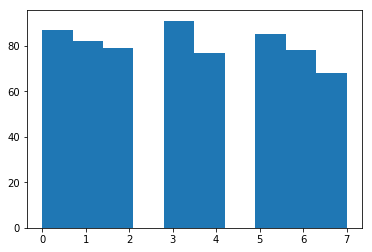


The non-passing engagement about has_visited: 

The mean value is:  1.90517241379
The standard deviation is:  1.90573144136
The min value is:  0
The max value is:  7


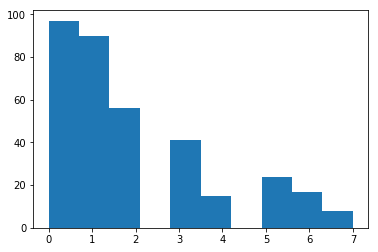


The passing engagement about lessons_completed: 

The mean value is:  2.05255023184
The standard deviation is:  3.14222705558
The min value is:  0
The max value is:  36


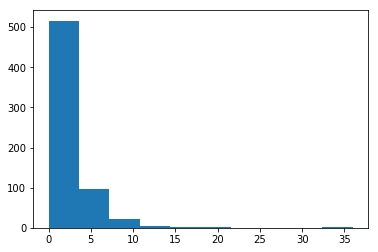


The non-passing engagement about lessons_completed: 

The mean value is:  0.862068965517
The standard deviation is:  2.54915994183
The min value is:  0
The max value is:  27


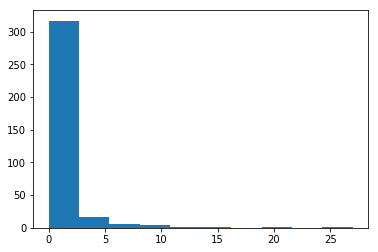


The passing engagement about total_minutes_visited: 

The mean value is:  394.586046484
The standard deviation is:  448.499519327
The min value is:  0.0
The max value is:  3564.7332645


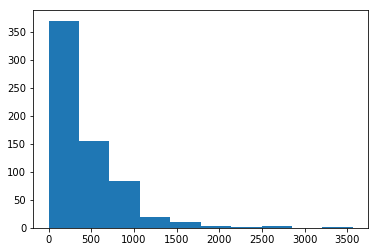


The non-passing engagement about total_minutes_visited: 

The mean value is:  143.326474267
The standard deviation is:  269.538619011
The min value is:  0.0
The max value is:  1768.52274933


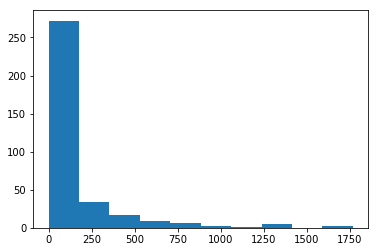

In [25]:
######################################
#                 13                 #
######################################

## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。
%matplotlib inline
import matplotlib.pyplot as plt
def describeData2(data):
    if type(data) != list:
        newdata = list(data)
    else:
        newdata = data
    print("The mean value is: ", np.mean(newdata))
    print("The standard deviation is: ", np.std(newdata))
    print("The min value is: ", np.min(newdata))
    print("The max value is: ", np.max(newdata))
    plt.hist(newdata)
    plt.show()

for i in ["has_visited", "lessons_completed", "total_minutes_visited"]:
    print("The passing engagement about %s: \n" % i)
    passing_engagement_data = groupSum(passing_engagement_by_account, i)
    describeData2(passing_engagement_data.values())
    print("="*55 + "\n")
    print("The non-passing engagement about %s: \n" % i)
    non_passing_engagement_data = groupSum(non_passing_engagement_by_account, i)
    describeData2(non_passing_engagement_data.values())
    print("="*55 + "\n")


## 改进图表及分享发现

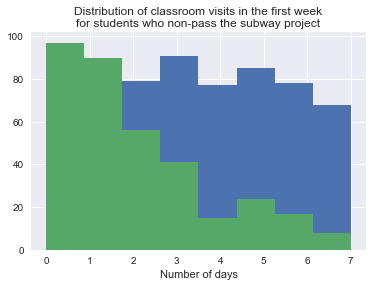

In [26]:
######################################
#                 14                 #
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。
import seaborn as sns
sns.set(color_codes=True)

passing_engagement_data = groupSum(passing_engagement_by_account, "has_visited")
non_passing_engagement_data = groupSum(non_passing_engagement_by_account, "has_visited")
plt.hist(list(passing_engagement_data.values()), bins=8)
plt.xlabel("Number of days")
plt.title("Distribution of classroom visits in the first week" + "\n" + 
          "for students who pass the subway project")

plt.hist(list(non_passing_engagement_data.values()), bins=8)
plt.xlabel("Number of days")
plt.title("Distribution of classroom visits in the first week" + "\n" + 
          "for students who non-pass the subway project")